# Viterbi Algorithm: Detecting CG-rich Genome Regions

## Problem Statement
### (Exercise 1) 
Use the Viterbi algorithm to find the most likely sequence of hidden states (R = CG-rich, P = CG-poor) for the DNA sequence: **GGACTGAA**

### HMM Parameters

- **Initial probabilities:** π_R = 0.5, π_P = 0.5
- **Transition probabilities:**
  - a_RR = 0.5, a_RP = 0.5
  - a_PR = 0.6, a_PP = 0.4
- **Emission probabilities:**
  - State R: T=0.2, C=0.3, A=0.2, G=0.3
  - State P: T=0.3, C=0.2, A=0.3, G=0.2


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the sequence
with open("sequence_case1.txt", "r") as f:
    seq = f.read()
seq = "".join(seq.split())
sequence = list(seq)
print(f"Sequence: {sequence}")
print(f"Length: {len(sequence)} nucleotides\n")

# Define states
states = ['R', 'P']  # R = CG-rich, P = CG-poor
print(f"Hidden states: {states}\n")

# Initial probabilities
initial_probs = {'R': 0.5, 'P': 0.5}
print("Initial probabilities:")
for state, prob in initial_probs.items():
    print(f"  π_{state} = {prob}")

# Transition probabilities
transition_probs = {
    'R': {'R': 0.5, 'P': 0.5},
    'P': {'R': 0.6, 'P': 0.4}
}
print("\nTransition probabilities:")
print("  a_RR = 0.5, a_RP = 0.5")
print("  a_PR = 0.6, a_PP = 0.4")

# Emission probabilities
emission_probs = {
    'R': {'T': 0.2, 'C': 0.3, 'A': 0.2, 'G': 0.3},
    'P': {'T': 0.3, 'C': 0.2, 'A': 0.3, 'G': 0.2}
}
print("\nEmission probabilities:")
print("  State R: T=0.2, C=0.3, A=0.2, G=0.3")
print("  State P: T=0.3, C=0.2, A=0.3, G=0.2")


Sequence: ['A', 'T', 'G', 'T', 'C', 'T', 'T', 'A', 'T', 'G', 'G', 'T', 'G', 'A', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'G', 'G', 'T', 'A', 'A', 'A', 'T', 'T', 'C', 'T', 'T', 'G', 'G', 'G', 'A', 'C', 'C', 'T', 'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'A', 'A', 'C', 'G', 'A', 'G', 'T', 'G', 'A', 'G', 'C', 'C', 'A', 'C', 'G', 'C', 'T', 'G', 'T', 'A', 'A', 'A', 'A', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'G', 'T', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A', 'G', 'A', 'G', 'T', 'C', 'G', 'T', 'A', 'T', 'G', 'T', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'A', 'A', 'T', 'C', 'A', 'T', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'C', 'T', 'G', 'A', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'A', 'G', 'A', 'A', 'T', 'C', 'C', 'A', 'A', 'G', 'A', 'G', 'A', 'A', 'A', 'A', 'C', 'T', 'G', 'G', 'A', 'A', 'A', 'T', 'G', 'A', 'T', 'T', 'G', 'G', 'G', 'T', 'C', 'C', 'C', 'T', 'G', 'T', 'G', 'A', 'C', 'C', 'A', 'T', 'C', 'A', 'T', 'T', 'G', 'A', 'T', 'G', 'T', 'C', 'A', 'G', 'A', 'G', 'G', 'A', 'C', 'A', 'T', 'A', 'G', 'T',

## Viterbi Algorithm Implementation


In [17]:
def viterbi(sequence, states, initial_probs, transition_probs, emission_probs, verbose=True):
    """
    Viterbi algorithm to find the most likely sequence of hidden states.
    
    Parameters:
    - sequence: observed sequence of nucleotides
    - states: list of hidden states
    - initial_probs: dictionary of initial probabilities for each state
    - transition_probs: nested dictionary of transition probabilities
    - emission_probs: nested dictionary of emission probabilities
    - verbose: if True, print detailed calculations
    
    Returns:
    - best_path: most likely sequence of hidden states
    - best_prob: probability of the best path
    - prob_matrix: matrix of probabilities P[t][s]
    - backpointer_matrix: matrix of backpointers Q[t][s]
    """
    T = len(sequence)
    num_states = len(states)
    
    # Initialize probability and back-pointer matrices
    prob_matrix = np.zeros((T, num_states))
    backpointer_matrix = np.zeros((T, num_states), dtype=int)
    
    if verbose:
        print("=" * 80)
        print("VITERBI ALGORITHM: STEP BY STEP CALCULATIONS")
        print("=" * 80)
        print()
    
    # Step 0: Initialization
    if verbose:
        print(f"Step 0: Initialization (observation: {sequence[0]})")
        print("-" * 80)
    
    for i, state in enumerate(states):
        prob_matrix[0, i] = initial_probs[state] * emission_probs[state][sequence[0]]
        if verbose:
            print(f"  P[0][{state}] = π_{state} × b_{state}({sequence[0]}) "
                  f"= {initial_probs[state]} × {emission_probs[state][sequence[0]]} "
                  f"= {prob_matrix[0, i]:.6f}")
    
    if verbose:
        print()
    
    # Steps 1 to T-1: Forward pass
    for t in range(1, T):
        if verbose:
            print(f"Step {t}: Processing observation {sequence[t]} (position {t})")
            print("-" * 80)
        
        for i, current_state in enumerate(states):
            max_prob = -1
            best_prev_state_idx = -1
            
            # Calculate probability for each previous state
            for j, prev_state in enumerate(states):
                prob = (prob_matrix[t-1, j] * 
                       transition_probs[prev_state][current_state] * 
                       emission_probs[current_state][sequence[t]])
                
                if verbose:
                    print(f"  From {prev_state}: P[{t-1}][{prev_state}] × a_{prev_state}{current_state} × "
                          f"b_{current_state}({sequence[t]}) = "
                          f"{prob_matrix[t-1, j]:.9f} × {transition_probs[prev_state][current_state]} × "
                          f"{emission_probs[current_state][sequence[t]]} = {prob:.9f}")
                
                if prob > max_prob:
                    max_prob = prob
                    best_prev_state_idx = j
            
            prob_matrix[t, i] = max_prob
            backpointer_matrix[t, i] = best_prev_state_idx
            
            best_prev_state = states[best_prev_state_idx]
            if verbose:
                print(f"  → P[{t}][{current_state}] = {max_prob:.9f} (from {best_prev_state})")
                print()
    
    # Back tracking: Find the best path
    if verbose:
        print("=" * 80)
        print("BACK TRACKING")
        print("=" * 80)
        print(f"\nFinal probabilities at t={T-1}:")
        for i, state in enumerate(states):
            print(f"  P[{T-1}][{state}] = {prob_matrix[T-1, i]:.12f}")
        print()
    
    # Find the best final state
    best_final_idx = np.argmax(prob_matrix[T-1, :])
    best_path = [states[best_final_idx]]
    best_prob = prob_matrix[T-1, best_final_idx]
    
    # Trace back through the backpointer matrix
    current_idx = best_final_idx
    for t in range(T-1, 0, -1):
        current_idx = backpointer_matrix[t, current_idx]
        best_path.insert(0, states[current_idx])
    
    if verbose:
        print("Most likely path (back tracking):")
        # Reconstruct path for display
        trace_idx = best_final_idx
        for t in range(T-1, 0, -1):
            prev_idx = backpointer_matrix[t, trace_idx]
            print(f"  t={t}: {states[trace_idx]} ← from {states[prev_idx]}")
            trace_idx = prev_idx
    
    return best_path, best_prob, prob_matrix, backpointer_matrix

# Run the Viterbi algorithm
best_path, best_prob, prob_matrix, backpointer_matrix = viterbi(
    sequence, states, initial_probs, transition_probs, emission_probs, verbose=True
)


VITERBI ALGORITHM: STEP BY STEP CALCULATIONS

Step 0: Initialization (observation: A)
--------------------------------------------------------------------------------
  P[0][R] = π_R × b_R(A) = 0.5 × 0.2 = 0.100000
  P[0][P] = π_P × b_P(A) = 0.5 × 0.3 = 0.150000

Step 1: Processing observation T (position 1)
--------------------------------------------------------------------------------
  From R: P[0][R] × a_RR × b_R(T) = 0.100000000 × 0.5 × 0.2 = 0.010000000
  From P: P[0][P] × a_PR × b_R(T) = 0.150000000 × 0.6 × 0.2 = 0.018000000
  → P[1][R] = 0.018000000 (from P)

  From R: P[0][R] × a_RP × b_P(T) = 0.100000000 × 0.5 × 0.3 = 0.015000000
  From P: P[0][P] × a_PP × b_P(T) = 0.150000000 × 0.4 × 0.3 = 0.018000000
  → P[1][P] = 0.018000000 (from P)

Step 2: Processing observation G (position 2)
--------------------------------------------------------------------------------
  From R: P[1][R] × a_RR × b_R(G) = 0.018000000 × 0.5 × 0.3 = 0.002700000
  From P: P[1][P] × a_PR × b_R(G) = 0.01

## Results


In [18]:
print("=" * 80)
print("FINAL RESULT")
print("=" * 80)
print(f"\nSequence: {sequence}")
print(f"Most likely hidden state sequence: {''.join(best_path)}")
print(f"Probability of this path: {best_prob:.12e}")
print(f"\nDetailed alignment:")
print("  Position:  ", end="")
for i in range(len(sequence)):
    print(f"{i:3d}", end="")
print("\n  Nucleotide: ", end="")
for nuc in sequence:
    print(f" {nuc} ", end="")
print("\n  State:      ", end="")
for state in best_path:
    print(f" {state} ", end="")
print("\n")


FINAL RESULT

Sequence: ['A', 'T', 'G', 'T', 'C', 'T', 'T', 'A', 'T', 'G', 'G', 'T', 'G', 'A', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'G', 'G', 'T', 'A', 'A', 'A', 'T', 'T', 'C', 'T', 'T', 'G', 'G', 'G', 'A', 'C', 'C', 'T', 'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'A', 'A', 'C', 'G', 'A', 'G', 'T', 'G', 'A', 'G', 'C', 'C', 'A', 'C', 'G', 'C', 'T', 'G', 'T', 'A', 'A', 'A', 'A', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'G', 'T', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A', 'G', 'A', 'G', 'T', 'C', 'G', 'T', 'A', 'T', 'G', 'T', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'A', 'A', 'T', 'C', 'A', 'T', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'C', 'T', 'G', 'A', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'A', 'G', 'A', 'A', 'T', 'C', 'C', 'A', 'A', 'G', 'A', 'G', 'A', 'A', 'A', 'A', 'C', 'T', 'G', 'G', 'A', 'A', 'A', 'T', 'G', 'A', 'T', 'T', 'G', 'G', 'G', 'T', 'C', 'C', 'C', 'T', 'G', 'T', 'G', 'A', 'C', 'C', 'A', 'T', 'C', 'A', 'T', 'T', 'G', 'A', 'T', 'G', 'T', 'C', 'A', 'G', 'A', 'G', 'G', 'A', 'C', 'A', 'T', 

## Probability Matrix Visualization


In [19]:
# Create a DataFrame for better visualization
prob_df = pd.DataFrame(prob_matrix, 
                       columns=states,
                       index=[f"t={i} ({sequence[i]})" for i in range(len(sequence))])
print("Probability Matrix P[t][s]:")
print(prob_df.to_string())
print()
print("Note: Values are the maximum probability of ending at state s at time t")


Probability Matrix P[t][s]:
                        R              P
t=0 (A)      1.000000e-01   1.500000e-01
t=1 (T)      1.800000e-02   1.800000e-02
t=2 (G)      3.240000e-03   1.800000e-03
t=3 (T)      3.240000e-04   4.860000e-04
t=4 (C)      8.748000e-05   3.888000e-05
t=5 (T)      8.748000e-06   1.312200e-05
t=6 (T)      1.574640e-06   1.574640e-06
t=7 (A)      1.889568e-07   2.361960e-07
t=8 (T)      2.834352e-08   2.834352e-08
t=9 (G)      5.101834e-09   2.834352e-09
t=10 (G)     7.652750e-10   5.101834e-10
t=11 (T)     7.652750e-11   1.147913e-10
t=12 (G)     2.066243e-11   9.183300e-12
t=13 (A)     2.066243e-12   3.099364e-12
t=14 (A)     3.719237e-13   3.719237e-13
t=15 (A)     4.463084e-14   5.578855e-14
t=16 (T)     6.694626e-15   6.694626e-15
t=17 (T)     8.033551e-16   1.004194e-15
t=18 (G)     1.807549e-16   8.033551e-17
t=19 (A)     1.807549e-17   2.711324e-17
t=20 (A)     3.253588e-18   3.253588e-18
t=21 (G)     5.856459e-19   3.253588e-19
t=22 (G)     8.784688e-20   5

## Interpretation

The Viterbi algorithm has determined the most likely sequence of hidden states.


In [20]:
# Analyze the result
print("Analysis of the result:")
print("-" * 80)
print(f"Sequence:      {sequence}")
print(f"Hidden states: {''.join(best_path)}")
print()

# Count regions
cg_rich_regions = []
cg_poor_regions = []
current_region_start = 0
current_state = best_path[0]

for i in range(1, len(best_path)):
    if best_path[i] != current_state:
        # Region ended
        if current_state == 'R':
            cg_rich_regions.append((current_region_start, i-1))
        else:
            cg_poor_regions.append((current_region_start, i-1))
        current_region_start = i
        current_state = best_path[i]

# Add the last region
if current_state == 'R':
    cg_rich_regions.append((current_region_start, len(best_path)-1))
else:
    cg_poor_regions.append((current_region_start, len(best_path)-1))

print("CG-rich regions (R):")
for start, end in cg_rich_regions:
    print(f"  Positions {start}-{end}: {sequence[start:end+1]}")

print("\nCG-poor regions (P):")
for start, end in cg_poor_regions:
    print(f"  Positions {start}-{end}: {sequence[start:end+1]}")

print(f"\nTotal CG-rich positions: {best_path.count('R')}")
print(f"Total CG-poor positions: {best_path.count('P')}")


Analysis of the result:
--------------------------------------------------------------------------------
Sequence:      ['A', 'T', 'G', 'T', 'C', 'T', 'T', 'A', 'T', 'G', 'G', 'T', 'G', 'A', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'G', 'G', 'T', 'A', 'A', 'A', 'T', 'T', 'C', 'T', 'T', 'G', 'G', 'G', 'A', 'C', 'C', 'T', 'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'A', 'A', 'C', 'G', 'A', 'G', 'T', 'G', 'A', 'G', 'C', 'C', 'A', 'C', 'G', 'C', 'T', 'G', 'T', 'A', 'A', 'A', 'A', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'G', 'T', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A', 'G', 'A', 'G', 'T', 'C', 'G', 'T', 'A', 'T', 'G', 'T', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'A', 'A', 'T', 'C', 'A', 'T', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'C', 'T', 'G', 'A', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'A', 'G', 'A', 'A', 'T', 'C', 'C', 'A', 'A', 'G', 'A', 'G', 'A', 'A', 'A', 'A', 'C', 'T', 'G', 'G', 'A', 'A', 'A', 'T', 'G', 'A', 'T', 'T', 'G', 'G', 'G', 'T', 'C', 'C', 'C', 'T', 'G', 'T', 'G', 'A', 'C', 'C', 'A', 'T',

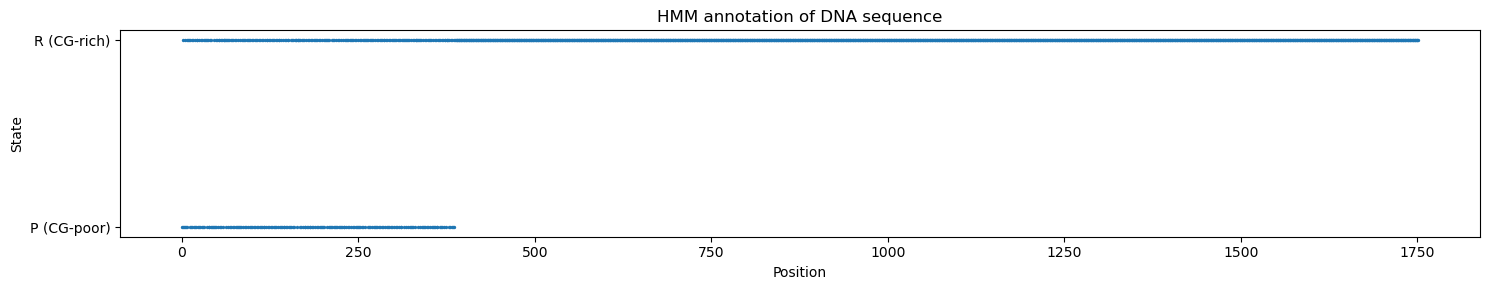

In [23]:
# Additional Visualisation
# HMM Annotation
state_numeric = np.array([1 if s == 'R' else 0 for s in best_path])

plt.figure(figsize=(15,3))
plt.scatter(range(len(state_numeric)), state_numeric, s=2)
plt.yticks([0,1], ["P (CG-poor)", "R (CG-rich)"])
plt.xlabel("Position")
plt.ylabel("State")
plt.title("HMM annotation of DNA sequence")
plt.tight_layout()
plt.show()

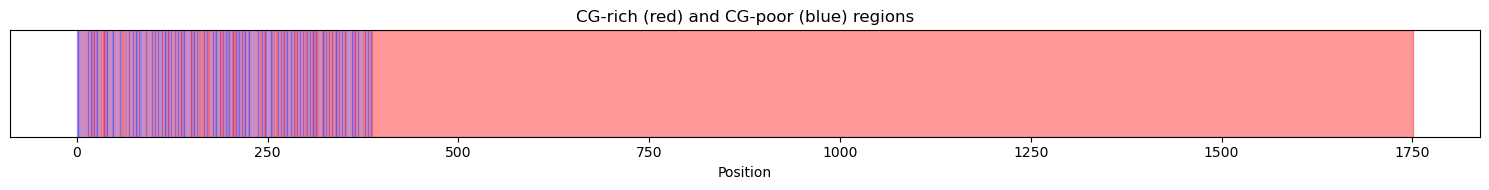

In [27]:
# Region visualisation

plt.figure(figsize=(15,2))

for start, end in cg_rich_regions:
    plt.axvspan(start, end, color="red", alpha=0.4)
for start, end in cg_poor_regions:
    plt.axvspan(start, end, color="blue", alpha=0.3)

plt.xlabel("Position")
plt.yticks([])
plt.title("CG-rich (red) and CG-poor (blue) regions")
plt.tight_layout()
plt.show()

## Verification: Manual Calculation Check

To verify a few key calculations manually:


In [22]:
# Verify initial step
print("Verification of Step 0:")
print(f"  P[0][R] = π_R × b_R(G) = {initial_probs['R']} × {emission_probs['R']['G']} = {prob_matrix[0, 0]:.6f}")
print(f"  P[0][P] = π_P × b_P(G) = {initial_probs['P']} × {emission_probs['P']['G']} = {prob_matrix[0, 1]:.6f}")
print()

# Verify step 1
print("Verification of Step 1 (observation: G):")
from_R_to_R = prob_matrix[0, 0] * transition_probs['R']['R'] * emission_probs['R']['G']
from_P_to_R = prob_matrix[0, 1] * transition_probs['P']['R'] * emission_probs['R']['G']
print(f"  From R: P[0][R] × a_RR × b_R(G) = {prob_matrix[0, 0]:.6f} × 0.5 × 0.3 = {from_R_to_R:.6f}")
print(f"  From P: P[0][P] × a_PR × b_R(G) = {prob_matrix[0, 1]:.6f} × 0.6 × 0.3 = {from_P_to_R:.6f}")
print(f"  => P[1][R] = max({from_R_to_R:.6f}, {from_P_to_R:.6f}) = {prob_matrix[1, 0]:.6f}")


Verification of Step 0:
  P[0][R] = π_R × b_R(G) = 0.5 × 0.3 = 0.100000
  P[0][P] = π_P × b_P(G) = 0.5 × 0.2 = 0.150000

Verification of Step 1 (observation: G):
  From R: P[0][R] × a_RR × b_R(G) = 0.100000 × 0.5 × 0.3 = 0.015000
  From P: P[0][P] × a_PR × b_R(G) = 0.150000 × 0.6 × 0.3 = 0.027000
  => P[1][R] = max(0.015000, 0.027000) = 0.018000
